# Efficient weighted and unweighted [closeness centrality](https://en.wikipedia.org/wiki/Closeness_centrality) with [GRAPE](https://github.com/AnacletoLAB/grape)
In this tutorial, we will explore the concept of [closeness centrality](https://en.wikipedia.org/wiki/Closeness_centrality) and its importance in network analysis. By the end of this tutorial, you will have a good understanding of how to compute [closeness centrality](https://en.wikipedia.org/wiki/Closeness_centrality) and apply it to your own network analysis projects using [GRAPE](https://github.com/AnacletoLAB/grape).

## Closeness centrality
Closeness centrality is a popular graph metric used in network analysis to identify the most important or influential nodes within a network. **It measures how quickly information can spread from a given node to all other nodes in the network. A node with high closeness centrality is one that is closely connected to many other nodes in the network and is therefore able to communicate information to other nodes quickly.**

Mathematically, the closeness centrality of a node is calculated as the reciprocal of the sum of its shortest path distances to all other nodes in the network. In other words, a node's closeness centrality is higher if it is closer to all other nodes in the network, and lower if it is farther away.

Closeness centrality is particularly useful in settings where the efficiency of communication or transportation is important, such as in transportation networks, social networks, and communication networks. For example, in a transportation network, a node with high closeness centrality might represent a major transportation hub or a densely populated urban area, while a node with low closeness centrality might represent a rural area with poor transportation infrastructure.

Closeness centrality can also be used in combination with other network metrics, such as degree centrality (which measures the number of connections a node has) and betweenness centrality (which measures the importance of a node in facilitating communication between other nodes) to gain a more complete understanding of a network's structure and function.

We will then demonstrate how to use the [GRAPE](https://github.com/AnacletoLAB/grape) library to compute [closeness centrality](https://en.wikipedia.org/wiki/Closeness_centrality) on three citation graphs and three protein-protein interaction graphs.

[Find the Rust implementation here](https://github.com/AnacletoLAB/ensmallen/blob/f7c7782d061aa1bb18ea476cf8a1a59def052f96/graph/src/centrality.rs#L227).

### Weighted closeness centrality
Weighted closeness centrality is a variation of the standard closeness centrality measure that takes into account the weights or distances between nodes in a network. In this measure, instead of using a simple breadth-first search (BFS) to calculate the shortest path distances between nodes, a Dijkstra algorithm is used to compute the shortest paths taking into account the weights of the edges. This approach is particularly useful when the edges of the network have different costs or weights, such as in transportation networks where the distance between two nodes may depend on the mode of transportation or the time of day. By incorporating edge weights into the calculation, the weighted closeness centrality measure provides a more accurate and nuanced view of the importance of nodes in a network. It can be used to identify nodes that are not only closely connected to other nodes, but also well-connected to important or influential nodes, thus providing a more comprehensive picture of the network's structure and function.

[Find the Rust implementation here](https://github.com/AnacletoLAB/ensmallen/blob/f7c7782d061aa1bb18ea476cf8a1a59def052f96/graph/src/centrality.rs#L254)

### Weight as probabilities closeness centrality
In certain graphs, such as the STRING protein-protein interaction network, the edge weights represent probabilities rather than actual distances or costs. In these cases, the most probable path between two nodes may not necessarily be the shortest path in terms of distance or cost. To account for this, we can adjust the weights of the edges to reflect the likelihood of each path. Specifically, we can convert the edge weights into log-odds scores, which represent the probability of a given path compared to a background probability of all possible paths. Then, we can apply a Dijkstra algorithm using these log-odds scores to find the most likely path between two nodes. By taking into account the probability of each path, this approach can provide a more accurate and informative measure of closeness centrality in graphs with probabilistic weights.

## What is [GRAPE](https://github.com/AnacletoLAB/grape)?
🍇🍇 [GRAPE](https://github.com/AnacletoLAB/grape) 🍇🍇 is a graph processing and embedding library that enables users to easily manipulate and analyze graphs. With [GRAPE](https://github.com/AnacletoLAB/grape), users can efficiently load and preprocess graphs, generate random walks, and apply various node and edge embedding models. Additionally, [GRAPE](https://github.com/AnacletoLAB/grape) provides a fair and reproducible evaluation pipeline for comparing different graph embedding and graph-based prediction methods.

![[GRAPE](https://github.com/AnacletoLAB/grape)](https://github.com/AnacletoLAB/grape/raw/main/images/sequence_diagram.png?raw=true)]

## Experiments
In this section, we will present the results of our experiments using the parallel closeness centrality algorithm implemented in GRAPE. We loaded three citation graphs, Cora, CiteSeer, and PubmedDiabetes, and three protein-protein interaction graphs, Homo Sapiens, Canis Lupus, and Mus Musculus. We will show the closeness centrality scores of each graph as histograms, which will give us an insight into the centrality of nodes in the network. By comparing the results of these experiments, we will be able to understand the performance of the algorithm on different types of graphs and the distribution of closeness centrality scores in each graph.

In [1]:
from grape.datasets.linqs import Cora, CiteSeer, PubMedDiabetes, get_words_data

cora = Cora()
citeseer = CiteSeer()
pubmed = PubMedDiabetes()

2023-05-02 21:53:41.514423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-02 21:53:41.514445: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(cora.get_number_of_nodes(), cora.get_number_of_directed_edges(), cora.get_diameter())

(4141, 108988, 6.0)

In [3]:
%%time
cora_closeness = cora.get_closeness_centrality()

CPU times: user 1.06 s, sys: 437 µs, total: 1.06 s
Wall time: 45.4 ms


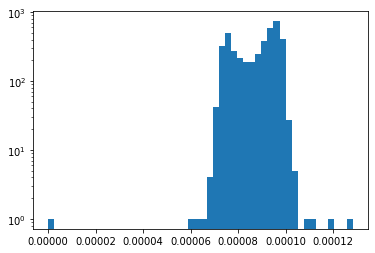

In [4]:
import matplotlib.pyplot as plt

plt.hist(cora_closeness, bins=50, log=True)
plt.show()

In [5]:
(citeseer.get_number_of_nodes(), citeseer.get_number_of_directed_edges(), citeseer.get_diameter())

(7030, 219558, 6.0)

In [6]:
%%time
citeseer_closeness = citeseer.get_closeness_centrality()

CPU times: user 3.49 s, sys: 12.1 ms, total: 3.51 s
Wall time: 148 ms


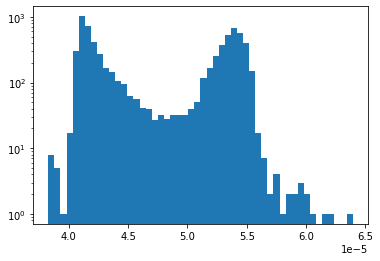

In [7]:
import matplotlib.pyplot as plt

plt.hist(citeseer_closeness, bins=50, log=True)
plt.show()

In [8]:
(pubmed.get_number_of_nodes(), pubmed.get_number_of_directed_edges(), pubmed.get_diameter())

(20217, 2064713, 4.0)

In [9]:
%%time
pubmed_closeness = pubmed.get_closeness_centrality()

CPU times: user 1min 13s, sys: 0 ns, total: 1min 13s
Wall time: 3.07 s


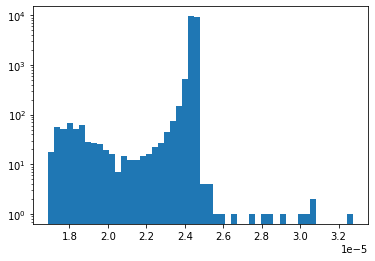

In [10]:
import matplotlib.pyplot as plt

plt.hist(pubmed_closeness, bins=50, log=True)
plt.show()

In [11]:
from IPython.display import display, HTML, Markdown
from typing import List, Tuple
import matplotlib.pyplot as plt
from ensmallen import Graph
import numpy as np
import pandas as pd
from time import time

def top_ranked_values(
    graph: Graph,
    score: np.ndarray,
    k: int = 10
) -> List[Tuple[float, int]]:
    """Return.
    
    Parameters
    ----------------
    graph: Graph
        The graph whose nodes are to be ranked.
    score: np.ndarray
        The scores to use for the ranking.
    k: int = 10
        Number of values to rank.
    """
    return sorted([
        (
            score[node_id],
            graph.get_node_name_from_node_id(node_id),
        )
        for node_id in np.argpartition(score, -k)[-k:]
    ], reverse=True)


def closeness_report(graph: Graph):
    display(Markdown(
        f"## {graph.get_name()}\n"
        f"The current graph, {graph.get_name()}, "
        f"has {graph.get_number_of_nodes()} and "
        f"{graph.get_number_of_directed_edges()} edges. "
        f"The diameter of the graph is {graph.get_diameter()}."
    ))
    
    display(Markdown(
        "### Unweighted closeness centrality\n"
        "We will now compute the **unweighted** closeness centrality with the following one-liner:\n"
        "\n\n"
        "```python\n"
        "unweighted_closeness = graph.get_closeness_centrality()\n"
        "```\n"
    ))
    
    start = time()
    unweighted_closeness = graph.get_closeness_centrality()
    delta = time() - start
    
    display(Markdown(
        f"Computing the unweighted closeness centrality took {delta:.4} seconds."
    ))
    
    display(Markdown(
        "And let's now display the histogram of the unweighted closeness centralities:"
    ))
    
    plt.hist(unweighted_closeness, bins=50, log=True)
    plt.title("Unweighted closeness centrality")
    plt.show()
    
    display(Markdown(
        "Let's see which of the proteins in this graph have the highest closeness centrality:"
    ))
    
    display(pd.DataFrame(
        top_ranked_values(graph, unweighted_closeness),
        columns=["unweighted_closeness", "protein"]
    ))
    
    display(Markdown(
        "### Weighted closeness centrality\n"
        "We will now compute the **weighted** closeness centrality with the following one-liner:\n"
        "\n\n"
        "```python\n"
        "weighted_closeness = graph.get_weighted_closeness_centrality()\n"
        "```\n"
    ))
    
    start = time()
    weighted_closeness = graph.get_weighted_closeness_centrality()
    delta = time() - start
    
    display(Markdown(
        f"Computing the weighted closeness centrality took {delta:.4} seconds."
    ))
    
    display(Markdown(
        "And let's now display the histogram of the weighted closeness centralities:"
    ))
    
    plt.hist(weighted_closeness, bins=50, log=True)
    plt.title("Weighted closeness centrality")
    plt.show()
    
    display(Markdown(
        "Let's see which of the proteins in this graph have the highest weighted closeness centrality:"
    ))
    
    display(pd.DataFrame(
        top_ranked_values(graph, weighted_closeness),
        columns=["weighted_closeness", "protein"]
    ))
    
    display(Markdown(
        "### Weight as probabilities closeness centrality\n"
        "We will now compute the **probability weights** closeness centrality with the following couple lines:\n"
        "\n\n"
        "```python\n"
        "# First, we normalize the PPI graph weights which go from 100 to 1000\n"
        "graph = graph.divide_edge_weights(1000.0)\n"
        "# then, we compute the centralities\n"
        "probability_closeness = graph.get_weighted_closeness_centrality(\n"
        "\tuse_edge_weights_as_probabilities=True\n"
        ")\n"
        "```\n"
    ))
    
    graph = graph.divide_edge_weights(1000.0)

    start = time()
    probability_closeness = graph.get_weighted_closeness_centrality(
        use_edge_weights_as_probabilities=True
    )
    delta = time() - start
    
    display(Markdown(
        f"Computing the probability closeness centrality took {delta:.4} seconds."
    ))
    
    display(Markdown(
        "And let's now display the histogram of the probability closeness centralities:"
    ))
    
    plt.hist(probability_closeness, bins=50, log=True)
    plt.title("Log-probability closeness centrality")
    plt.show()
    
    display(Markdown(
        "Let's see which of the proteins in this graph have the highest log-probability closeness centrality:"
    ))
    
    display(pd.DataFrame(
        top_ranked_values(graph, probability_closeness),
        columns=["probability_closeness", "protein"]
    ))

In [12]:
from grape.datasets.string import HomoSapiens, CanisLupusFamiliaris, MusMusculus

homo_sapiens = HomoSapiens()
doggo = CanisLupusFamiliaris()
mouse = MusMusculus()

# We only keep the main connected component
homo_sapiens = homo_sapiens.remove_components(top_k_components=1)
doggo = doggo.remove_components(top_k_components=1)
mouse = mouse.remove_components(top_k_components=1)

## HomoSapiens
The current graph, HomoSapiens, has 19385 and 11938498 edges. The diameter of the graph is 5.0.

### Unweighted closeness centrality
We will now compute the **unweighted** closeness centrality with the following one-liner:


```python
unweighted_closeness = graph.get_closeness_centrality()
```


Computing the unweighted closeness centrality took 20.31 seconds.

And let's now display the histogram of the unweighted closeness centralities:

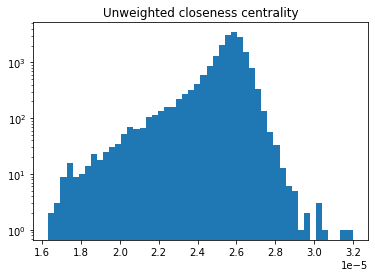

Let's see which of the proteins in this graph have the highest closeness centrality:

,unweighted_closeness,protein
0,0.000032,9606.ENSP00000229239
1,0.000031,9606.ENSP00000349960
2,0.000030,9606.ENSP00000451828
3,0.000030,9606.ENSP00000298910
4,0.000030,9606.ENSP00000269305
5,0.000030,9606.ENSP00000479618
6,0.000030,9606.ENSP00000344456
7,0.000030,9606.ENSP00000295897
8,0.000029,9606.ENSP00000275493
9,0.000029,9606.ENSP00000335153


### Weighted closeness centrality
We will now compute the **weighted** closeness centrality with the following one-liner:


```python
weighted_closeness = graph.get_weighted_closeness_centrality()
```


Computing the weighted closeness centrality took 65.18 seconds.

And let's now display the histogram of the weighted closeness centralities:

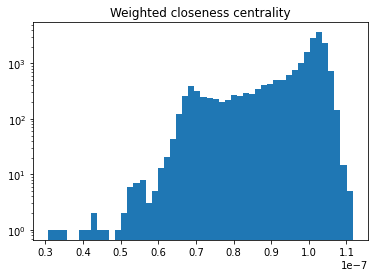

Let's see which of the proteins in this graph have the highest weighted closeness centrality:

,weighted_closeness,protein
0,1.116411e-07,9606.ENSP00000378401
1,1.107156e-07,9606.ENSP00000417132
2,1.104671e-07,9606.ENSP00000366898
3,1.103345e-07,9606.ENSP00000312778
4,1.103202e-07,9606.ENSP00000260264
5,1.098526e-07,9606.ENSP00000354560
6,1.097866e-07,9606.ENSP00000312734
7,1.097836e-07,9606.ENSP00000305714
8,1.094497e-07,9606.ENSP00000444201
9,1.092497e-07,9606.ENSP00000378132


### Weight as probabilities closeness centrality
We will now compute the **probability weights** closeness centrality with the following couple lines:


```python
# First, we normalize the PPI graph weights which go from 100 to 1000
graph = graph.divide_edge_weights(1000.0)
# then, we compute the centralities
probability_closeness = graph.get_weighted_closeness_centrality(
	use_edge_weights_as_probabilities=True
)
```


Computing the probability closeness centrality took 238.5 seconds.

And let's now display the histogram of the probability closeness centralities:

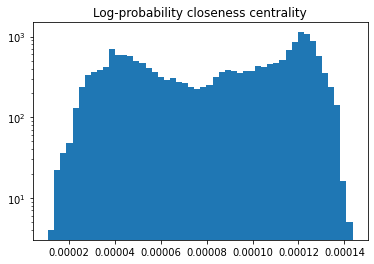

Let's see which of the proteins in this graph have the highest log-probability closeness centrality:

,probability_closeness,protein
0,0.000144,9606.ENSP00000419004
1,0.000143,9606.ENSP00000382779
2,0.000142,9606.ENSP00000265245
3,0.000142,9606.ENSP00000229179
4,0.000141,9606.ENSP00000261396
5,0.000141,9606.ENSP00000262144
6,0.000140,9606.ENSP00000367721
7,0.000140,9606.ENSP00000342262
8,0.000140,9606.ENSP00000293883
9,0.000139,9606.ENSP00000448054


In [13]:
closeness_report(homo_sapiens)

## CanisLupusFamiliaris
The current graph, CanisLupusFamiliaris, has 19129 and 8591130 edges. The diameter of the graph is 5.0.

### Unweighted closeness centrality
We will now compute the **unweighted** closeness centrality with the following one-liner:


```python
unweighted_closeness = graph.get_closeness_centrality()
```


Computing the unweighted closeness centrality took 13.76 seconds.

And let's now display the histogram of the unweighted closeness centralities:

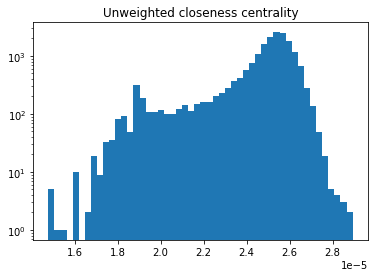

Let's see which of the proteins in this graph have the highest closeness centrality:

,unweighted_closeness,protein
0,0.000029,9615.ENSCAFP00000064590
1,0.000029,9615.ENSCAFP00000001523
2,0.000029,9615.ENSCAFP00000007783
3,0.000028,9615.ENSCAFP00000044065
4,0.000028,9615.ENSCAFP00000013612
5,0.000028,9615.ENSCAFP00000005164
6,0.000028,9615.ENSCAFP00000064230
7,0.000028,9615.ENSCAFP00000040726
8,0.000028,9615.ENSCAFP00000014627
9,0.000028,9615.ENSCAFP00000045099


### Weighted closeness centrality
We will now compute the **weighted** closeness centrality with the following one-liner:


```python
weighted_closeness = graph.get_weighted_closeness_centrality()
```


Computing the weighted closeness centrality took 46.25 seconds.

And let's now display the histogram of the weighted closeness centralities:

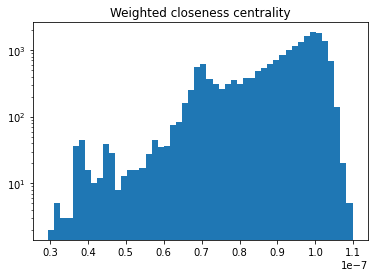

Let's see which of the proteins in this graph have the highest weighted closeness centrality:

,weighted_closeness,protein
0,1.097961e-07,9615.ENSCAFP00000065614
1,1.093034e-07,9615.ENSCAFP00000016812
2,1.087181e-07,9615.ENSCAFP00000061641
3,1.085760e-07,9615.ENSCAFP00000007187
4,1.084386e-07,9615.ENSCAFP00000022721
5,1.076624e-07,9615.ENSCAFP00000012583
6,1.075776e-07,9615.ENSCAFP00000002754
7,1.074841e-07,9615.ENSCAFP00000038305
8,1.073778e-07,9615.ENSCAFP00000014294
9,1.072760e-07,9615.ENSCAFP00000058257


### Weight as probabilities closeness centrality
We will now compute the **probability weights** closeness centrality with the following couple lines:


```python
# First, we normalize the PPI graph weights which go from 100 to 1000
graph = graph.divide_edge_weights(1000.0)
# then, we compute the centralities
probability_closeness = graph.get_weighted_closeness_centrality(
	use_edge_weights_as_probabilities=True
)
```


Computing the probability closeness centrality took 167.7 seconds.

And let's now display the histogram of the probability closeness centralities:

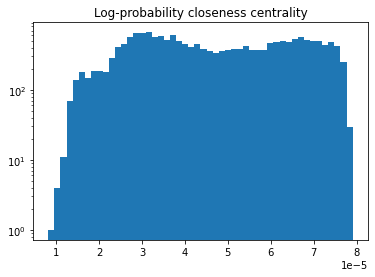

Let's see which of the proteins in this graph have the highest log-probability closeness centrality:

,probability_closeness,protein
0,0.000079,9615.ENSCAFP00000059679
1,0.000079,9615.ENSCAFP00000051404
2,0.000078,9615.ENSCAFP00000020216
3,0.000078,9615.ENSCAFP00000049921
4,0.000078,9615.ENSCAFP00000006129
5,0.000078,9615.ENSCAFP00000001725
6,0.000078,9615.ENSCAFP00000023734
7,0.000078,9615.ENSCAFP00000011229
8,0.000078,9615.ENSCAFP00000065523
9,0.000078,9615.ENSCAFP00000024193


In [14]:
closeness_report(doggo)

## MusMusculus
The current graph, MusMusculus, has 21266 and 14496230 edges. The diameter of the graph is 7.0.

### Unweighted closeness centrality
We will now compute the **unweighted** closeness centrality with the following one-liner:


```python
unweighted_closeness = graph.get_closeness_centrality()
```


Computing the unweighted closeness centrality took 27.81 seconds.

And let's now display the histogram of the unweighted closeness centralities:

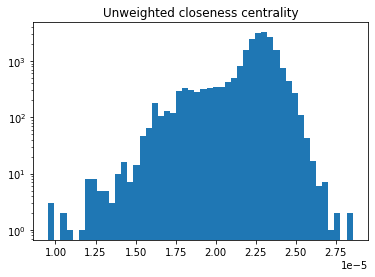

Let's see which of the proteins in this graph have the highest closeness centrality:

,unweighted_closeness,protein
0,0.000029,10090.ENSMUSP00000098066
1,0.000028,10090.ENSMUSP00000001780
2,0.000028,10090.ENSMUSP00000104298
3,0.000027,10090.ENSMUSP00000113942
4,0.000027,10090.ENSMUSP00000023507
5,0.000027,10090.ENSMUSP00000032399
6,0.000027,10090.ENSMUSP00000007130
7,0.000027,10090.ENSMUSP00000083385
8,0.000027,10090.ENSMUSP00000019386
9,0.000027,10090.ENSMUSP00000026572


### Weighted closeness centrality
We will now compute the **weighted** closeness centrality with the following one-liner:


```python
weighted_closeness = graph.get_weighted_closeness_centrality()
```


Computing the weighted closeness centrality took 89.53 seconds.

And let's now display the histogram of the weighted closeness centralities:

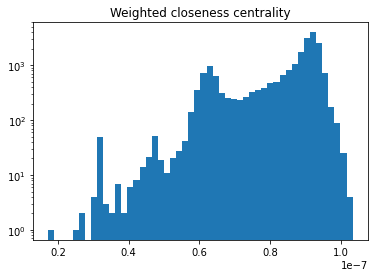

Let's see which of the proteins in this graph have the highest weighted closeness centrality:

,weighted_closeness,protein
0,1.032984e-07,10090.ENSMUSP00000049488
1,1.021043e-07,10090.ENSMUSP00000065393
2,1.018341e-07,10090.ENSMUSP00000124264
3,1.015961e-07,10090.ENSMUSP00000042883
4,1.013159e-07,10090.ENSMUSP00000027952
5,1.012996e-07,10090.ENSMUSP00000033822
6,1.011491e-07,10090.ENSMUSP00000071976
7,1.010894e-07,10090.ENSMUSP00000099902
8,1.010769e-07,10090.ENSMUSP00000082754
9,1.010336e-07,10090.ENSMUSP00000031913


### Weight as probabilities closeness centrality
We will now compute the **probability weights** closeness centrality with the following couple lines:


```python
# First, we normalize the PPI graph weights which go from 100 to 1000
graph = graph.divide_edge_weights(1000.0)
# then, we compute the centralities
probability_closeness = graph.get_weighted_closeness_centrality(
	use_edge_weights_as_probabilities=True
)
```


Computing the probability closeness centrality took 314.4 seconds.

And let's now display the histogram of the probability closeness centralities:

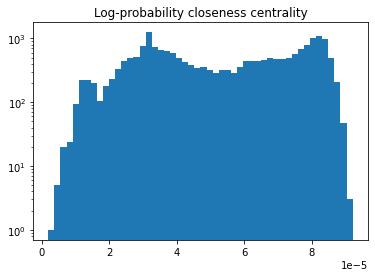

Let's see which of the proteins in this graph have the highest log-probability closeness centrality:

,probability_closeness,protein
0,0.000092,10090.ENSMUSP00000140536
1,0.000091,10090.ENSMUSP00000067786
2,0.000091,10090.ENSMUSP00000078746
3,0.000090,10090.ENSMUSP00000048057
4,0.000090,10090.ENSMUSP00000074573
5,0.000090,10090.ENSMUSP00000102538
6,0.000090,10090.ENSMUSP00000078875
7,0.000090,10090.ENSMUSP00000027291
8,0.000090,10090.ENSMUSP00000113852
9,0.000090,10090.ENSMUSP00000057916


In [15]:
closeness_report(mouse)

*I'm sure the implementation can be made even faster, but it's a first step to start experimenting with this important centrality.*